In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
train_path = '/kaggle/input/braintumor/Training'
test_path = '/kaggle/input/braintumor/Testing'

In [5]:
input_shape = (150,150,3)

In [6]:
model = Sequential()

2022-11-24 16:53:59.638811: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-24 16:53:59.730222: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-24 16:53:59.730996: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-24 16:53:59.732115: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [7]:
model.add(Conv2D(32,(3,3),input_shape=input_shape,activation='relu'))
model.add(Conv2D(32,(3,3),input_shape=input_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [8]:
model.add(Conv2D(32,(3,3),input_shape=input_shape,activation='relu'))
model.add(Conv2D(32,(3,3),input_shape=input_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [9]:
model.add(Conv2D(64,(3,3),input_shape=input_shape,activation='relu'))
model.add(Conv2D(64,(3,3),input_shape=input_shape,activation='relu'))
model.add(Conv2D(64,(3,3),input_shape=input_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [10]:
model.add(Conv2D(64,(3,3),input_shape=input_shape,activation='relu'))
model.add(Conv2D(64,(3,3),input_shape=input_shape,activation='relu'))
model.add(Conv2D(64,(3,3),input_shape=input_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [11]:
model.add(Flatten())

In [12]:
model.add(Dense(512,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(4,activation='softmax'))

In [13]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 146, 146, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 32)        9248      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 69, 69, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 34, 34, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 64)        1

In [15]:
image_data_generator = ImageDataGenerator(rescale = 1./255, rotation_range = 40,
                                         height_shift_range = 0.2, width_shift_range = 0.2,
                                         shear_range = 0.2, zoom_range = 0.2, 
                                         horizontal_flip=True, fill_mode = 'nearest')

In [16]:
train_images = image_data_generator.flow_from_directory(train_path,batch_size=32,
                                                       target_size=(150,150),shuffle = True,
                                                       class_mode='categorical')

Found 5712 images belonging to 4 classes.


In [17]:
test_images = image_data_generator.flow_from_directory(test_path,batch_size=1,
                                                       target_size=(150,150),shuffle = False,
                                                       class_mode='categorical')

Found 1311 images belonging to 4 classes.


In [18]:
early_stop = EarlyStopping(monitor='val_loss',patience=3)

In [19]:
model.fit(train_images,epochs=25,steps_per_epoch=len(train_images),
          validation_data=test_images,callbacks=[early_stop])

2022-11-24 16:54:39.086433: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/25


2022-11-24 16:54:41.082916: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


179/179 [==============================] - 80s 403ms/step - loss: 1.2154 - accuracy: 0.3967 - val_loss: 1.2081 - val_accuracy: 0.4188
Epoch 2/25
179/179 [==============================] - 54s 303ms/step - loss: 1.0511 - accuracy: 0.4916 - val_loss: 1.0774 - val_accuracy: 0.4600
Epoch 3/25
179/179 [==============================] - 54s 304ms/step - loss: 1.0111 - accuracy: 0.5429 - val_loss: 1.1319 - val_accuracy: 0.5263
Epoch 4/25
179/179 [==============================] - 54s 303ms/step - loss: 0.9434 - accuracy: 0.6068 - val_loss: 1.0330 - val_accuracy: 0.5843
Epoch 5/25
179/179 [==============================] - 54s 301ms/step - loss: 0.8794 - accuracy: 0.6434 - val_loss: 0.9005 - val_accuracy: 0.6209
Epoch 6/25
179/179 [==============================] - 55s 306ms/step - loss: 0.8501 - accuracy: 0.6542 - val_loss: 0.8851 - val_accuracy: 0.6545
Epoch 7/25
179/179 [==============================] - 54s 301ms/step - loss: 0.7966 - accuracy: 0.6831 - val_loss: 1.2382 - val_accuracy: 0.4

In [20]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

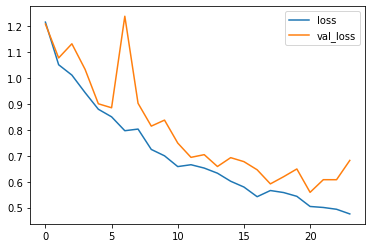

In [21]:
losses[['loss','val_loss']].plot()

<AxesSubplot:>

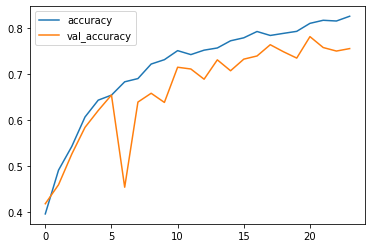

In [22]:
losses[['accuracy','val_accuracy']].plot()

In [23]:
predictions = model.predict(test_images)

In [24]:
print(predictions)

[[9.8068523e-01 1.8657431e-02 2.0518084e-05 6.3684263e-04]
 [9.1430861e-01 8.2993291e-02 1.9218327e-04 2.5058852e-03]
 [9.9946433e-01 4.3733601e-04 6.5994368e-07 9.7596167e-05]
 ...
 [2.1642217e-02 1.2788698e-01 3.9946400e-03 8.4647620e-01]
 [1.3801065e-01 7.8877205e-01 4.7986498e-03 6.8418689e-02]
 [2.2628531e-03 1.5654689e-02 2.1729667e-03 9.7990948e-01]]


In [25]:
model.evaluate(test_images)

1311/1311 [==============================] - 12s 9ms/step - loss: 0.6631 - accuracy: 0.7414


[0.6631053686141968, 0.7414187788963318]